# Dashboard Klasifikasi Gambar Menggunakan Model ResNet-50 | Streamlit

In [ ]:
!pip install captum

Traceback (most recent call last):
  File "c:\Users\Lenovo\.vscode\extensions\ms-python.python-2024.22.2-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    pip install captum
        ^^^^^^^
SyntaxError: invalid syntax



In [ ]:
import torch
print("PyTorch Version : {}".format(torch.__version__))
import torchvision
print("TorchVision Version : {}".format(torchvision.__version__))
import captum
print("Captum Version : {}".format(captum.__version__))
import matplotlib
print("Matplotlib Verion : {}".format(matplotlib.__version__))
import numpy as np
print("Numpy Version : {}".format(np.__version__))

PyTorch Version : 2.5.1+cpu
TorchVision Version : 0.20.1+cpu
Captum Version : 0.7.0
Matplotlib Verion : 3.10.0
Numpy Version : 2.2.2


## 1. Load Model

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model.eval();

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 155MB/s]


In [ ]:
preprocess_func = ResNet50_Weights.IMAGENET1K_V2.transforms()
preprocess_func

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
categories = np.array(ResNet50_Weights.IMAGENET1K_V2.meta["categories"])
len(categories), categories[:5]

(1000,
 array(['tench', 'goldfish', 'great white shark', 'tiger shark',
        'hammerhead'], dtype='<U30'))

## 2. Melakukan Prediksi

## 2.1 Mengunggah Gambar

In [ ]:
from PIL import Image
shark = Image.open("shark.jpg")
shark.size

(640, 475)

In [ ]:
shark

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x475 at 0x14352DDBDD0>


### 2.2 Pre-process Gambar

In [ ]:
processed_img = preprocess_func(shark)
processed_img.shape

torch.Size([3, 224, 224])

### 2.3 Prediksi

In [ ]:
probs = model(processed_img.unsqueeze(0))
probs = probs.softmax(1)
probs = probs[0].detach().numpy()

###2.4 Sorting / Mengurutkan Probabilitas

In [ ]:
prob = probs[probs.argsort()[-5:][::-1]]
idxs = probs.argsort()[-5:][::-1]

prob, idxs

(array([0.53391576, 0.00302059, 0.00298607, 0.00283407, 0.00244832],
       dtype=float32),
 array([  3,   2,   4,  13, 814]))

In [ ]:
categories[idxs]

['tiger shark' 'great white shark' 'hammerhead' 'junco' 'speedboat']


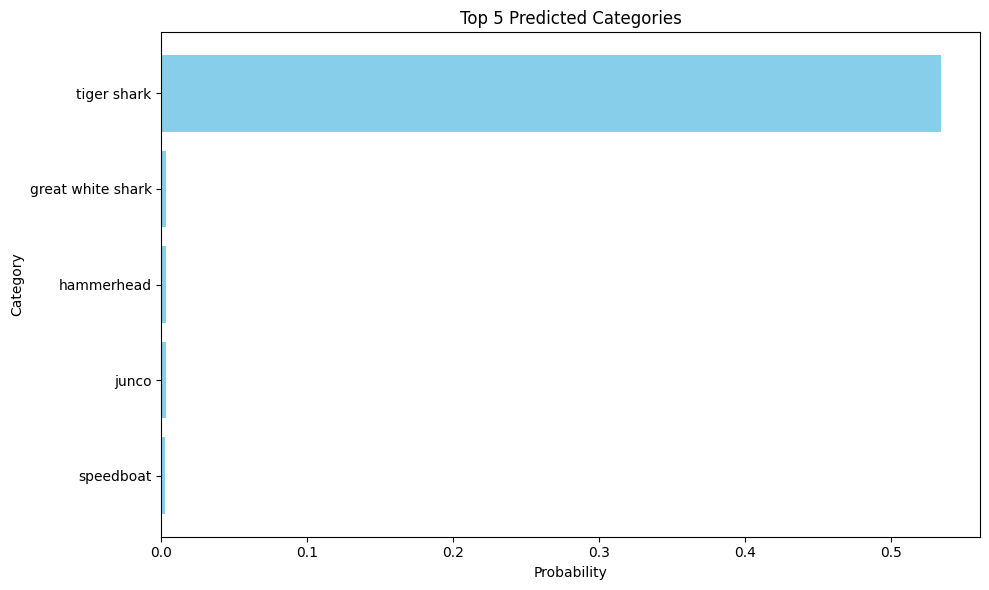

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(categories[idxs], prob, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Category')
plt.title('Top 5 Predicted Categories')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##3. Menginterpretasikan Prediksi

In [ ]:
from captum.attr import IntegratedGradients
interpretation_algo = IntegratedGradients(model)

In [ ]:
feature_imp = interpretation_algo.attribute(processed_img.unsqueeze(0), target=3)
feature_imp.shape

torch.Size([1, 3, 224, 224])

In [ ]:
feature_imp = feature_imp[0].numpy()
feature_imp = feature_imp.transpose(1,2,0)
feature_imp.shape

(224, 224, 3)

In [ ]:
processed_img_np = processed_img.numpy().transpose(1,2,0)
processed_img_np.shape

(224, 224, 3)

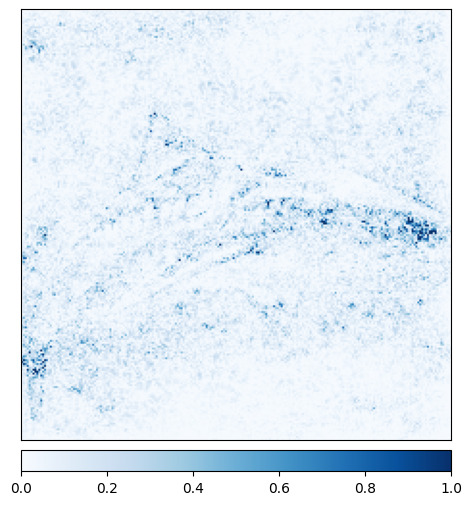

In [ ]:
from captum.attr import visualization as viz
fig, ax = viz.visualize_image_attr(feature_imp, show_colorbar=True, fig_size=(6,6));

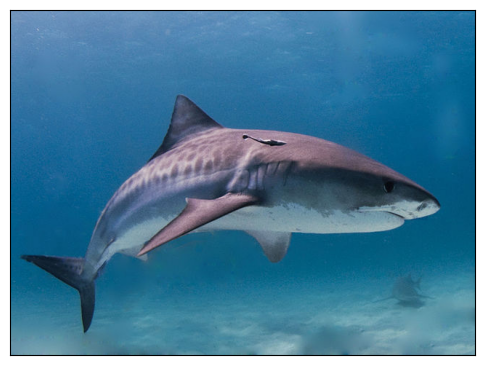

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

plt.imshow(shark);
plt.xticks([],[]);
plt.yticks([],[]);

## Referensi

* [1] “Captum: Interpret Predictions Of PyTorch Image Classification Networks.” Accessed: Jan. 23, 2025. [Online]. Available: https://coderzcolumn.com/tutorials/artificial-intelligence/captum-for-pytorch-image-classification-networks

* [2] “PyTorch: Image Classification using Pre-Trained Models.” Accessed: Jan. 23, 2025. [Online]. Available: https://coderzcolumn.com/tutorials/artificial-intelligence/pytorch-image-classification-using-pre-trained-models
